In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils import to_categorical


from sklearn import metrics 
from sklearn.model_selection import train_test_split

In [3]:
dataLabels = ['tree','house','zero','bed','yes','four','up','stop','no','wow','nine','happy','follow', 'visual','cat','two', 'forward', 'down','right', 'marvin', 'seven', 'go', 'three',  'backward', 'on', 'dog', 'one', 'sheila', 'eight', 'bird', 'six', 'learn', 'off', 'left', 'five']
file_path='/content/drive/MyDrive/Colab Notebooks/data/'

In [4]:
def get_train_test(filepath,labels):
    # Getting first arrays
    X = np.load(file_path+labels[0]+'.npy')
    y = np.zeros(X.shape[0])

    # Append all of the dataset into one single array, same goes for y
    for i, label in enumerate(labels[1:]):
        x = np.load(file_path+label + '.npy')
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

    assert X.shape[0] == len(y)

    return train_test_split(X, y, test_size= 0.2, random_state=42, shuffle=True)

In [5]:
X_train, X_test, y_train, y_test = get_train_test(file_path,dataLabels)

In [6]:
# # Feature dimension

epochs = 50
batch_size = 100

num_classes = 35
channels = 1
max_len = 44
buckets = 20

X_train = X_train.reshape(X_train.shape[0], buckets, max_len, channels)
X_test = X_test.reshape(X_test.shape[0],  buckets, max_len, channels)

32.0


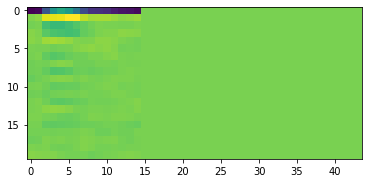

In [7]:
plt.imshow(X_train[100, :, :, 0])
print(y_train[100])

In [8]:
y_train_hot = to_categorical(y_train,dtype='float32')
y_test_hot = to_categorical(y_test,dtype='float32')

In [9]:
X_train = X_train.reshape(X_train.shape[0], buckets, max_len)
X_test = X_test.reshape(X_test.shape[0], buckets, max_len)

In [10]:
X_train.shape, X_test.shape

((84663, 20, 44), (21166, 20, 44))

In [ ]:
# # lr = 0.01
# loss: 27.4943 - accuracy: 0.4399 - val_loss: 27.2929 - val_accuracy: 0.4311
# loss: 26.3002 - accuracy: 0.4495 - val_loss: 26.3374 - val_accuracy: 0.4521
# loss: 1.8144 - accuracy: 0.3435 - val_loss: 1.6906 - val_accuracy: 0.4290
# loss: 1.7225 - accuracy: 0.3773 - val_loss: 1.6321 - val_accuracy: 0.4430
# loss: 1.5523 - accuracy: 0.4461 - val_loss: 1.4504 - val_accuracy: 0.5420
# loss: 1.0734 - accuracy: 0.6404 - val_loss: 1.1595 - val_accuracy: 0.6581
# loss: 0.8476 - accuracy: 0.7358 - val_loss: 0.9975 - val_accuracy: 0.7095

# epochs 100

In [17]:
# build model
model = Sequential()
model.add(Flatten(input_shape=(buckets, max_len)))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
# model.add(Dropout(0.6))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
# model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [18]:
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 880)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               225536    
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               131584    
_________________________________________________________________
activation_14 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)             

In [19]:
model.fit(X_train,y_train_hot, epochs=100, validation_data=(X_test, y_test_hot))

Epoch 1/100
2646/2646 [==============================] - 9s 3ms/step - loss: 3.4431 - accuracy: 0.1698 - val_loss: 1.8907 - val_accuracy: 0.4684
Epoch 2/100
2646/2646 [==============================] - 8s 3ms/step - loss: 2.0866 - accuracy: 0.3842 - val_loss: 1.6264 - val_accuracy: 0.5386
Epoch 3/100
2646/2646 [==============================] - 8s 3ms/step - loss: 1.8676 - accuracy: 0.4482 - val_loss: 1.4950 - val_accuracy: 0.5772
Epoch 4/100
2646/2646 [==============================] - 8s 3ms/step - loss: 1.7262 - accuracy: 0.4907 - val_loss: 1.3829 - val_accuracy: 0.6183
Epoch 5/100
2646/2646 [==============================] - 8s 3ms/step - loss: 1.6478 - accuracy: 0.5158 - val_loss: 1.3609 - val_accuracy: 0.6193
Epoch 6/100
2646/2646 [==============================] - 8s 3ms/step - loss: 1.5812 - accuracy: 0.5331 - val_loss: 1.3018 - val_accuracy: 0.6362
Epoch 7/100
2646/2646 [==============================] - 8s 3ms/step - loss: 1.5352 - accuracy: 0.5493 - val_loss: 1.2209 - val_ac

In [ ]:
model.save("my_h5_model.h5")

In [ ]:
! cp my_h5_model.h5 '/content/drive/MyDrive/Colab Notebooks/data/'